# AdaBoost Algorithm

In [167]:
import pandas as pd
import numpy as np

In [168]:
from mlxtend.plotting import plot_decision_regions

In [169]:
df = pd.DataFrame()

In [170]:
df['X1'] = [1,2,3,4,5,6,7,6,8,8]
df['X2'] = [2,3,4,5,4,5,6,7,8,3]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [171]:
df

,X1,X2,label
0,1,2,1
1,2,3,1
2,3,4,0
3,4,5,1
4,5,4,0
5,6,5,1
6,7,6,0
7,6,7,1
8,8,8,0
9,8,3,0


<Axes: xlabel='X1', ylabel='X2'>

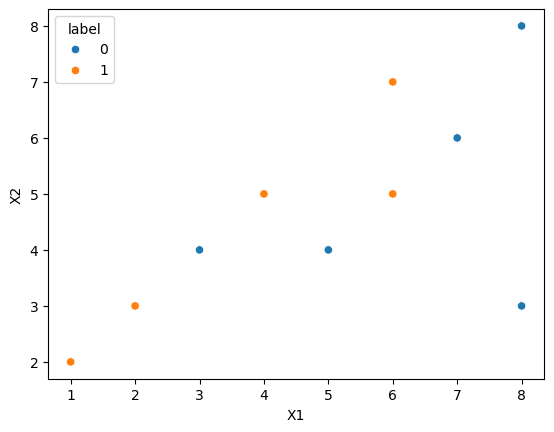

In [172]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [173]:
df['weights'] = 1/df.shape[0]

In [174]:
df

,X1,X2,label,weights
0,1,2,1,0.1
1,2,3,1,0.1
2,3,4,0,0.1
3,4,5,1,0.1
4,5,4,0,0.1
5,6,5,1,0.1
6,7,6,0,0.1
7,6,7,1,0.1
8,8,8,0,0.1
9,8,3,0,0.1


In [175]:
from sklearn.tree import DecisionTreeClassifier

In [176]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [177]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [178]:
# Step-1 train 1st model

dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 6.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.625, 0.5, '  False')]

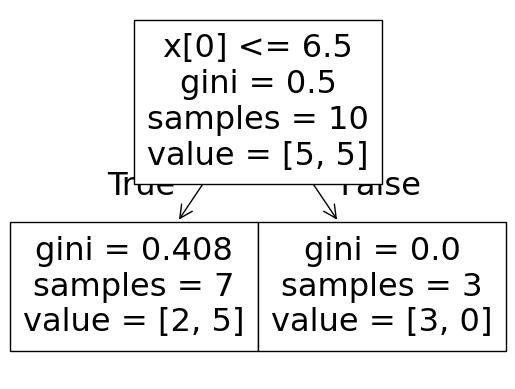

In [179]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

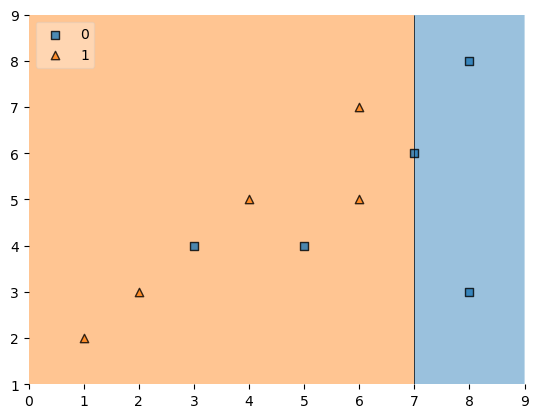

In [180]:
plot_decision_regions(X,y,clf=dt1, legend=2)

In [181]:
df['y_pred'] = dt1.predict(X)

In [182]:
df

,X1,X2,label,weights,y_pred
0,1,2,1,0.1,1
1,2,3,1,0.1,1
2,3,4,0,0.1,1
3,4,5,1,0.1,1
4,5,4,0,0.1,1
5,6,5,1,0.1,1
6,7,6,0,0.1,0
7,6,7,1,0.1,1
8,8,8,0,0.1,0
9,8,3,0,0.1,0


In [183]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error))

In [184]:
# Step-2 calculate model weight

alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [185]:
# Step-3 Update weights

def update_row_weights(row,alpha=0.423):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

In [186]:
df['updated_weights'] = df.apply(update_row_weights, axis=1)

In [187]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,2,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,4,0,0.1,1,0.152653
3,4,5,1,0.1,1,0.065508
4,5,4,0,0.1,1,0.152653
5,6,5,1,0.1,1,0.065508
6,7,6,0,0.1,0,0.065508
7,6,7,1,0.1,1,0.065508
8,8,8,0,0.1,0,0.065508
9,8,3,0,0.1,0,0.065508


In [188]:
df['updated_weights'].sum()

0.8293697656827363

In [189]:
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [190]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,2,1,0.1,1,0.065508,0.078985
1,2,3,1,0.1,1,0.065508,0.078985
2,3,4,0,0.1,1,0.152653,0.184060
3,4,5,1,0.1,1,0.065508,0.078985
4,5,4,0,0.1,1,0.152653,0.184060
5,6,5,1,0.1,1,0.065508,0.078985
6,7,6,0,0.1,0,0.065508,0.078985
7,6,7,1,0.1,1,0.065508,0.078985
8,8,8,0,0.1,0,0.065508,0.078985
9,8,3,0,0.1,0,0.065508,0.078985


In [191]:
df['normalized_weights'].sum()

1.0

In [192]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])

In [193]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

In [194]:
df[['X1','X2','label','weights', 'y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,2,1,0.1,1,0.065508,0.000000,0.078985
1,2,3,1,0.1,1,0.065508,0.078985,0.157970
2,3,4,0,0.1,1,0.152653,0.157970,0.342030
3,4,5,1,0.1,1,0.065508,0.342030,0.421015
4,5,4,0,0.1,1,0.152653,0.421015,0.605074
5,6,5,1,0.1,1,0.065508,0.605074,0.684060
6,7,6,0,0.1,0,0.065508,0.684060,0.763045
7,6,7,1,0.1,1,0.065508,0.763045,0.842030
8,8,8,0,0.1,0,0.065508,0.842030,0.921015
9,8,3,0,0.1,0,0.065508,0.921015,1.000000


In [195]:
def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index, row in df.iterrows():
            if row['cumsum_upper'] > a and a>row['cumsum_lower']:
                indices.append(index)

    return indices

In [196]:
index_values = create_new_dataset(df)
index_values

[3, 2, 2, 2, 0, 6, 1, 6, 2, 0]

In [197]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [198]:
second_df

,X1,X2,label,weights
3,4,5,1,0.1
2,3,4,0,0.1
2,3,4,0,0.1
2,3,4,0,0.1
0,1,2,1,0.1
6,7,6,0,0.1
1,2,3,1,0.1
6,7,6,0,0.1
2,3,4,0,0.1
0,1,2,1,0.1


In [199]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [200]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [201]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.625, 0.5, '  False')]

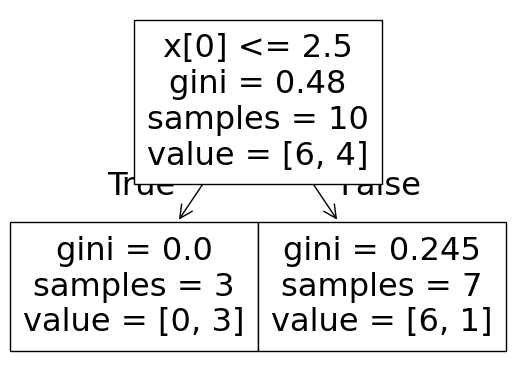

In [202]:
plot_tree(dt2)

<Axes: >

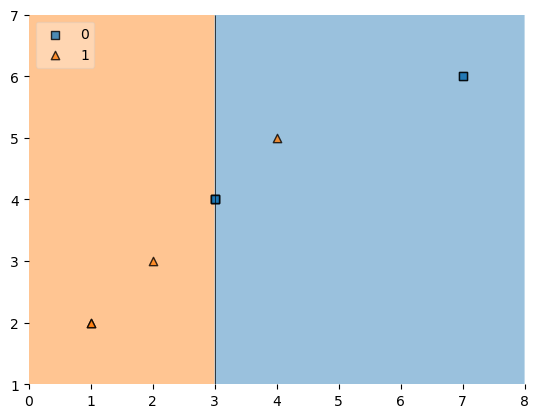

In [203]:
plot_decision_regions(X,y, clf=dt2,legend=2)

In [204]:
second_df['y_pred'] = dt2.predict(X)

In [205]:
second_df

,X1,X2,label,weights,y_pred
3,4,5,1,0.1,0
2,3,4,0,0.1,0
2,3,4,0,0.1,0
2,3,4,0,0.1,0
0,1,2,1,0.1,1
6,7,6,0,0.1,0
1,2,3,1,0.1,1
6,7,6,0,0.1,0
2,3,4,0,0.1,0
0,1,2,1,0.1,1


In [206]:
alpha2 = calculate_model_weight(0.1)

In [207]:
alpha2

1.0986122886681098

In [208]:
# update weights 
def update_row_weights(row, alpha=1.09):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)

    else:
        return row['weights'] * np.exp(alpha)

In [209]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [210]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
3,4,5,1,0.1,0,0.297427
2,3,4,0,0.1,0,0.033622
2,3,4,0,0.1,0,0.033622
2,3,4,0,0.1,0,0.033622
0,1,2,1,0.1,1,0.033622
6,7,6,0,0.1,0,0.033622
1,2,3,1,0.1,1,0.033622
6,7,6,0,0.1,0,0.033622
2,3,4,0,0.1,0,0.033622
0,1,2,1,0.1,1,0.033622


In [211]:
second_df['normalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [212]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
3,4,5,1,0.1,0,0.297427,0.495694
2,3,4,0,0.1,0,0.033622,0.056034
2,3,4,0,0.1,0,0.033622,0.056034
2,3,4,0,0.1,0,0.033622,0.056034
0,1,2,1,0.1,1,0.033622,0.056034
6,7,6,0,0.1,0,0.033622,0.056034
1,2,3,1,0.1,1,0.033622,0.056034
6,7,6,0,0.1,0,0.033622,0.056034
2,3,4,0,0.1,0,0.033622,0.056034
0,1,2,1,0.1,1,0.033622,0.056034


In [213]:
second_df['normalized_weights'].sum()

0.9999999999999999

In [215]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])

In [216]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']

In [217]:
second_df[['X1','X2','label','weights', 'y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
3,4,5,1,0.1,0,0.297427,0.000000,0.495694
2,3,4,0,0.1,0,0.033622,0.495694,0.551728
2,3,4,0,0.1,0,0.033622,0.551728,0.607762
2,3,4,0,0.1,0,0.033622,0.607762,0.663796
0,1,2,1,0.1,1,0.033622,0.663796,0.719830
6,7,6,0,0.1,0,0.033622,0.719830,0.775864
1,2,3,1,0.1,1,0.033622,0.775864,0.831898
6,7,6,0,0.1,0,0.033622,0.831898,0.887932
2,3,4,0,0.1,0,0.033622,0.887932,0.943966
0,1,2,1,0.1,1,0.033622,0.943966,1.000000


In [218]:
index_values = create_new_dataset(second_df)

In [219]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [220]:
third_df

,X1,X2,label,weights
1,2,3,1,0.1
2,3,4,0,0.1
2,3,4,0,0.1
2,3,4,0,0.1
2,3,4,0,0.1
2,3,4,0,0.1
3,4,5,1,0.1
2,3,4,0,0.1
2,3,4,0,0.1
2,3,4,0,0.1


In [222]:
dt3 = DecisionTreeClassifier(max_depth=1)

In [223]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [224]:
dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

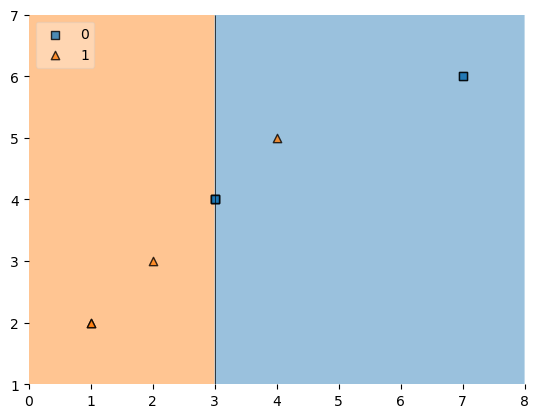

In [225]:
plot_decision_regions(X,y,clf= dt3, legend=2)

In [226]:
third_df['y_pred'] = dt3.predict(X)

In [227]:
third_df

,X1,X2,label,weights,y_pred
1,2,3,1,0.1,0
2,3,4,0,0.1,0
2,3,4,0,0.1,0
2,3,4,0,0.1,0
2,3,4,0,0.1,1
2,3,4,0,0.1,0
3,4,5,1,0.1,1
2,3,4,0,0.1,0
2,3,4,0,0.1,0
2,3,4,0,0.1,1


In [228]:
alpha3 = calculate_model_weight(0.7)
alpha3

-0.4236489301936017

### Prediction

In [234]:
query = np.array([1,2]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [235]:
dt2.predict(query)

array([1], dtype=int64)

In [236]:
dt3.predict(query)

array([1], dtype=int64)

In [237]:
alpha1*(1) + alpha2*(1) + alpha3*(1)

1.09861228866811

In [238]:
np.sign(1.09)

1.0

In [242]:
query = np.array([5,4]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [243]:
dt2.predict(query)

array([0], dtype=int64)

In [244]:
dt3.predict(query)

array([0], dtype=int64)

In [246]:
np.sign(alpha1*(1) + alpha2*(-1) + alpha3*(-1))

-1.0